In [85]:
import numpy as np

In [86]:
import pandas as pd

In [87]:
match = pd.read_csv('matches.csv')

In [88]:
match.shape

(1024, 20)

match.head()

In [89]:
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [90]:
delivery = pd.read_csv('deliveries.csv')

In [91]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


We need to find the total score in the first inning of every match

In [92]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

C:\Users\kavil\AppData\Local\Temp\ipykernel_23896\2553512226.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()


In [93]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [94]:
total_score_df


,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
2065,1359544,1,197
2067,1370350,1,172
2069,1370351,1,182
2071,1370352,1,233


Add the total_runs column to match table using merge

In [95]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [96]:
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,1359544,2023,Bengaluru,2023-05-21,League,Shubman Gill,"M Chinnaswamy Stadium, Bengaluru",Royal Challengers Bangalore,Gujarat Titans,Gujarat Titans,...,wickets,6.0,198.0,20.0,N,NaN,Nitin Menon,VK Sharma,1359544,197
1020,1370350,2023,Chennai,2023-05-23,Qualifier 1,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai Super Kings,Gujarat Titans,Gujarat Titans,...,runs,15.0,173.0,20.0,N,NaN,AK Chaudhary,CB Gaffaney,1370350,172
1021,1370351,2023,Chennai,2023-05-24,Eliminator,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai",Mumbai Indians,Lucknow Super Giants,Mumbai Indians,...,runs,81.0,183.0,20.0,N,NaN,BNJ Oxenford,VK Sharma,1370351,182
1022,1370352,2023,Ahmedabad,2023-05-26,Qualifier 2,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Mumbai Indians,Mumbai Indians,...,runs,62.0,234.0,20.0,N,NaN,Nitin Menon,RJ Tucker,1370352,233


Filter out the matches of those teams who will not play IPL 2024
We will combine Delhi Daredevils with Delhi Capitals, Deccan Chargers with Sunrisers Hyderabad, Kings XI Punjab with Punjab Kings and remove KTK, PWI, GL,RPSG teams.
To remove teams, lets create an array with valid team names and then write a query to filter the teams which are not in the array.

In [97]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Punjab Kings',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals',
    'Lucknow Super Giants',
    'Gujarat Titans'
]

In [98]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['winner'] = match_df['winner'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['winner'] = match_df['winner'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['team1'] = match_df['team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
match_df['team2'] = match_df['team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
match_df['team2'] = match_df['team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
match_df['winner'] = match_df['winner'].str.replace('Kings XI Punjab', 'Punjab Kings')

In [99]:
match_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110


In [100]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [101]:
match_df.shape

(909, 22)

In [102]:
match_df['method'].value_counts()

D/L    17
Name: method, dtype: int64

Here we can remove 17 matches that was affected by rain

In [103]:
match_df = match_df[match_df['method'] != "D/L"]

In [104]:
match_df.shape

(892, 22)

In [105]:
match_df = match_df[['match_id', 'city', 'winner', 'total_runs']]

In [106]:
delivery_df = match_df.merge(delivery,on='match_id')

In [107]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213874,1370352,Ahmedabad,Gujarat Titans,233,2,Mumbai Indians,Gujarat Titans,17,4,JP Behrendorff,J Little,K Kartikeya,1,0,1,NaN,0,NaN,NaN,NaN
213875,1370352,Ahmedabad,Gujarat Titans,233,2,Mumbai Indians,Gujarat Titans,17,5,K Kartikeya,J Little,JP Behrendorff,4,0,4,NaN,0,NaN,NaN,NaN
213876,1370352,Ahmedabad,Gujarat Titans,233,2,Mumbai Indians,Gujarat Titans,17,6,K Kartikeya,J Little,JP Behrendorff,0,0,0,NaN,0,NaN,NaN,NaN
213877,1370352,Ahmedabad,Gujarat Titans,233,2,Mumbai Indians,Gujarat Titans,18,1,JP Behrendorff,MM Sharma,K Kartikeya,1,0,1,NaN,0,NaN,NaN,NaN


Now after merging the two rows, I need only the rows where innings value is 2 as I am finding the probability of chasing team to win the match

In [108]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [109]:
delivery_df.shape

(103511, 20)

Now our main work is to find the runs_left and balls_left after every ball.

In [110]:
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y'] #totol_runs_at_every_ball

C:\Users\kavil\AppData\Local\Temp\ipykernel_23896\414881596.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y'] #totol_runs_at_every_ball
C:\Users\kavil\AppData\Local\Temp\ipykernel_23896\414881596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y'] #totol_runs_at_every_ball


In [111]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,R Dravid,0,1,1,wides,0,NaN,NaN,NaN,2
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN,2
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN,3
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213874,1370352,Ahmedabad,Gujarat Titans,233,2,Mumbai Indians,Gujarat Titans,17,4,JP Behrendorff,...,K Kartikeya,1,0,1,NaN,0,NaN,NaN,NaN,166
213875,1370352,Ahmedabad,Gujarat Titans,233,2,Mumbai Indians,Gujarat Titans,17,5,K Kartikeya,...,JP Behrendorff,4,0,4,NaN,0,NaN,NaN,NaN,170
213876,1370352,Ahmedabad,Gujarat Titans,233,2,Mumbai Indians,Gujarat Titans,17,6,K Kartikeya,...,JP Behrendorff,0,0,0,NaN,0,NaN,NaN,NaN,170
213877,1370352,Ahmedabad,Gujarat Titans,233,2,Mumbai Indians,Gujarat Titans,18,1,JP Behrendorff,...,K Kartikeya,1,0,1,NaN,0,NaN,NaN,NaN,171


In [112]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

C:\Users\kavil\AppData\Local\Temp\ipykernel_23896\1162889266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']


In [113]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,0,1,NaN,0,NaN,NaN,NaN,1,221
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,1,1,wides,0,NaN,NaN,NaN,2,220
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,0,NaN,0,NaN,NaN,NaN,2,220
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,0,1,NaN,0,NaN,NaN,NaN,3,219
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,0,1,NaN,0,NaN,NaN,NaN,4,218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213874,1370352,Ahmedabad,Gujarat Titans,233,2,Mumbai Indians,Gujarat Titans,17,4,JP Behrendorff,...,1,0,1,NaN,0,NaN,NaN,NaN,166,67
213875,1370352,Ahmedabad,Gujarat Titans,233,2,Mumbai Indians,Gujarat Titans,17,5,K Kartikeya,...,4,0,4,NaN,0,NaN,NaN,NaN,170,63
213876,1370352,Ahmedabad,Gujarat Titans,233,2,Mumbai Indians,Gujarat Titans,17,6,K Kartikeya,...,0,0,0,NaN,0,NaN,NaN,NaN,170,63
213877,1370352,Ahmedabad,Gujarat Titans,233,2,Mumbai Indians,Gujarat Titans,18,1,JP Behrendorff,...,1,0,1,NaN,0,NaN,NaN,NaN,171,62


In [114]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

C:\Users\kavil\AppData\Local\Temp\ipykernel_23896\517047302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])


In [115]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,1,221,125
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,1,wides,0,NaN,NaN,NaN,2,220,124
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,0,NaN,NaN,NaN,2,220,123
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,1,NaN,0,NaN,NaN,NaN,3,219,122
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,4,218,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213874,1370352,Ahmedabad,Gujarat Titans,233,2,Mumbai Indians,Gujarat Titans,17,4,JP Behrendorff,...,0,1,NaN,0,NaN,NaN,NaN,166,67,20
213875,1370352,Ahmedabad,Gujarat Titans,233,2,Mumbai Indians,Gujarat Titans,17,5,K Kartikeya,...,0,4,NaN,0,NaN,NaN,NaN,170,63,19
213876,1370352,Ahmedabad,Gujarat Titans,233,2,Mumbai Indians,Gujarat Titans,17,6,K Kartikeya,...,0,0,NaN,0,NaN,NaN,NaN,170,63,18
213877,1370352,Ahmedabad,Gujarat Titans,233,2,Mumbai Indians,Gujarat Titans,18,1,JP Behrendorff,...,0,1,NaN,0,NaN,NaN,NaN,171,62,17


Now we need another attribute called wicket_left which represents how many wickets are left at a particular ball in a match.

So we start by converting the values of player_dismissed, if NaN then "0" else "1". And then we group by the matchid and calculate the wickets left.

In [116]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets_left'] = 10 - wickets
delivery_df.head()

C:\Users\kavil\AppData\Local\Temp\ipykernel_23896\1997724059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
C:\Users\kavil\AppData\Local\Temp\ipykernel_23896\1997724059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
C:\Users\kavil\AppData\Local\Temp\ipykernel_23896\1997724059.py:3: SettingWithCopyWarning: 
A value is 

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,NaN,0,0,NaN,NaN,1,221,125,10
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,wides,0,0,NaN,NaN,2,220,124,10
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,0,0,NaN,NaN,2,220,123,10
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,NaN,0,0,NaN,NaN,3,219,122,10
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,NaN,0,0,NaN,NaN,4,218,121,10


In [117]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,NaN,0,0,NaN,NaN,1,221,125,10
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,wides,0,0,NaN,NaN,2,220,124,10
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,0,0,NaN,NaN,2,220,123,10
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,NaN,0,0,NaN,NaN,3,219,122,10
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,NaN,0,0,NaN,NaN,4,218,121,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213874,1370352,Ahmedabad,Gujarat Titans,233,2,Mumbai Indians,Gujarat Titans,17,4,JP Behrendorff,...,1,NaN,0,0,NaN,NaN,166,67,20,1
213875,1370352,Ahmedabad,Gujarat Titans,233,2,Mumbai Indians,Gujarat Titans,17,5,K Kartikeya,...,4,NaN,0,0,NaN,NaN,170,63,19,1
213876,1370352,Ahmedabad,Gujarat Titans,233,2,Mumbai Indians,Gujarat Titans,17,6,K Kartikeya,...,0,NaN,0,0,NaN,NaN,170,63,18,1
213877,1370352,Ahmedabad,Gujarat Titans,233,2,Mumbai Indians,Gujarat Titans,18,1,JP Behrendorff,...,1,NaN,0,0,NaN,NaN,171,62,17,1


The last two attributes would be current_runRate and required_runRate

In [118]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

C:\Users\kavil\AppData\Local\Temp\ipykernel_23896\2048085250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])


In [119]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

C:\Users\kavil\AppData\Local\Temp\ipykernel_23896\2241449921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']


In [120]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr,rrr
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,0,NaN,NaN,1,221,125,10,-1.200000,10.608000
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,0,NaN,NaN,2,220,124,10,-3.000000,10.645161
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,NaN,2,220,123,10,-4.000000,10.731707
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,0,NaN,NaN,3,219,122,10,-9.000000,10.770492
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,0,NaN,NaN,4,218,121,10,-24.000000,10.809917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213874,1370352,Ahmedabad,Gujarat Titans,233,2,Mumbai Indians,Gujarat Titans,17,4,JP Behrendorff,...,0,0,NaN,NaN,166,67,20,1,9.960000,20.100000
213875,1370352,Ahmedabad,Gujarat Titans,233,2,Mumbai Indians,Gujarat Titans,17,5,K Kartikeya,...,0,0,NaN,NaN,170,63,19,1,10.099010,19.894737
213876,1370352,Ahmedabad,Gujarat Titans,233,2,Mumbai Indians,Gujarat Titans,17,6,K Kartikeya,...,0,0,NaN,NaN,170,63,18,1,10.000000,21.000000
213877,1370352,Ahmedabad,Gujarat Titans,233,2,Mumbai Indians,Gujarat Titans,18,1,JP Behrendorff,...,0,0,NaN,NaN,171,62,17,1,9.961165,21.882353


A last row, winner row where the team won would be recorded

In [121]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [122]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

C:\Users\kavil\AppData\Local\Temp\ipykernel_23896\955537649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['result'] = delivery_df.apply(result,axis=1)


In [123]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','crr','rrr','result']]

In [124]:
final_df = final_df.sample(final_df.shape[0]) #shuffled (since all balls of the matches are grouped)

In [125]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
115606,Mumbai Indians,Sunrisers Hyderabad,Mumbai,60,52,7,158,8.647059,6.923077,1


In [126]:
final_df.isnull().sum()

batting_team       0
bowling_team       0
city            6012
runs_left          0
balls_left         0
wickets_left       0
total_runs_x       0
crr               27
rrr                0
result             0
dtype: int64

In [127]:
final_df.dropna(inplace=True)

In [128]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
194510,Kolkata Knight Riders,Lucknow Super Giants,Navi Mumbai,38,19,4,210,10.217822,12.000000,0
31568,Rajasthan Royals,Deccan Chargers,Ahmedabad,79,78,9,148,9.857143,6.076923,1
429,Kings XI Punjab,Chennai Super Kings,Chandigarh,99,48,8,240,11.750000,12.375000,0
90274,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,156,122,10,160,-12.000000,7.672131,1
36950,Kings XI Punjab,Delhi Daredevils,Delhi,25,39,8,111,6.370370,3.846154,0
...,...,...,...,...,...,...,...,...,...,...
94061,Delhi Daredevils,Chennai Super Kings,Chennai,135,113,10,150,12.857143,7.168142,0
175427,Delhi Capitals,Mumbai Indians,Sharjah,26,31,4,129,6.943820,5.032258,1
47991,Rajasthan Royals,Chennai Super Kings,Jaipur,80,33,5,196,8.000000,14.545455,0
125555,Royal Challengers Bangalore,Delhi Daredevils,Bengaluru,67,52,7,174,9.441176,7.730769,1


In [132]:
final_df = final_df[final_df['balls_left'] != 0]

In [133]:
final_df = final_df[final_df['crr'] != np.inf]

In [134]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
194510,Kolkata Knight Riders,Lucknow Super Giants,Navi Mumbai,38,19,4,210,10.217822,12.000000,0
31568,Rajasthan Royals,Deccan Chargers,Ahmedabad,79,78,9,148,9.857143,6.076923,1
429,Kings XI Punjab,Chennai Super Kings,Chandigarh,99,48,8,240,11.750000,12.375000,0
90274,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,156,122,10,160,-12.000000,7.672131,1
36950,Kings XI Punjab,Delhi Daredevils,Delhi,25,39,8,111,6.370370,3.846154,0
...,...,...,...,...,...,...,...,...,...,...
94061,Delhi Daredevils,Chennai Super Kings,Chennai,135,113,10,150,12.857143,7.168142,0
175427,Delhi Capitals,Mumbai Indians,Sharjah,26,31,4,129,6.943820,5.032258,1
47991,Rajasthan Royals,Chennai Super Kings,Jaipur,80,33,5,196,8.000000,14.545455,0
125555,Royal Challengers Bangalore,Delhi Daredevils,Bengaluru,67,52,7,174,9.441176,7.730769,1


## Model Building

In [135]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [136]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr
89544,Kolkata Knight Riders,Sunrisers Hyderabad,Hyderabad,130,108,9,142,6.000000,7.222222
108553,Sunrisers Hyderabad,Mumbai Indians,Hyderabad,141,125,10,142,-1.200000,6.768000
67358,Chennai Super Kings,Kings XI Punjab,Chandigarh,103,92,10,138,7.500000,6.717391
176957,Rajasthan Royals,Kolkata Knight Riders,Sharjah,168,118,8,171,9.000000,8.542373
167534,Sunrisers Hyderabad,Punjab Kings,Chennai,0,14,9,120,6.792453,0.000000
...,...,...,...,...,...,...,...,...,...
163812,Sunrisers Hyderabad,Delhi Capitals,Abu Dhabi,127,73,7,189,7.914894,10.438356
110713,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,177,117,9,185,16.000000,9.076923
115550,Mumbai Indians,Sunrisers Hyderabad,Mumbai,130,108,10,158,14.000000,7.222222
107440,Sunrisers Hyderabad,Royal Challengers Bangalore,Bangalore,121,54,5,227,9.636364,13.444444


#We have 3 columns batting_team, bowling_team and city as string so we need to apply one-hot encoding

In [137]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [138]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr
89544,Kolkata Knight Riders,Sunrisers Hyderabad,Hyderabad,130,108,9,142,6.000000,7.222222
108553,Sunrisers Hyderabad,Mumbai Indians,Hyderabad,141,125,10,142,-1.200000,6.768000
67358,Chennai Super Kings,Kings XI Punjab,Chandigarh,103,92,10,138,7.500000,6.717391
176957,Rajasthan Royals,Kolkata Knight Riders,Sharjah,168,118,8,171,9.000000,8.542373
167534,Sunrisers Hyderabad,Punjab Kings,Chennai,0,14,9,120,6.792453,0.000000
...,...,...,...,...,...,...,...,...,...
163812,Sunrisers Hyderabad,Delhi Capitals,Abu Dhabi,127,73,7,189,7.914894,10.438356
110713,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,177,117,9,185,16.000000,9.076923
115550,Mumbai Indians,Sunrisers Hyderabad,Mumbai,130,108,10,158,14.000000,7.222222
107440,Sunrisers Hyderabad,Royal Challengers Bangalore,Bangalore,121,54,5,227,9.636364,13.444444


In [139]:
#Logistics Regression

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [141]:
from sklearn.pipeline import Pipeline

In [142]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [143]:
pipe2 = Pipeline(steps=[
    ('step1',trf),
    ('step2', RandomForestClassifier())
])

In [144]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [145]:
pipe2.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', RandomForestClassifier())])

In [146]:
X_train.describe()

,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr
count,77328.000000,77328.000000,77328.000000,77328.000000,77328.000000,77328.000000
mean,92.080928,68.003039,7.488426,166.772825,8.865475,8.475805
std,50.038445,33.227172,2.163167,29.379553,7.395021,4.333670
min,-6.000000,4.000000,0.000000,62.000000,-132.000000,-9.000000
25%,53.000000,40.000000,6.000000,148.000000,7.235294,6.444444
50%,91.000000,69.000000,8.000000,167.000000,8.597938,8.093023
75%,129.000000,97.000000,9.000000,187.000000,10.200000,9.795918
max,257.000000,125.000000,10.000000,257.000000,162.000000,102.000000


In [147]:
y_pred = pipe.predict(X_test)

In [148]:
Y_pred2 = pipe2.predict(X_test)

In [149]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8539726877715704

In [150]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_pred2)

0.9994309952410511

In [151]:
X_test

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr
106050,Mumbai Indians,Sunrisers Hyderabad,Hyderabad,10,50,10,113,8.828571,1.200000
189385,Delhi Capitals,Lucknow Super Giants,Mumbai,127,87,8,195,12.363636,8.758621
100566,Delhi Daredevils,Kings XI Punjab,Delhi,29,59,10,118,8.754098,2.949153
180895,Delhi Capitals,Gujarat Titans,Pune,110,80,7,171,9.150000,8.250000
109355,Mumbai Indians,Delhi Daredevils,Delhi,44,28,6,164,7.826087,9.428571
...,...,...,...,...,...,...,...,...,...
28442,Delhi Daredevils,Mumbai Indians,Delhi,133,65,5,218,9.272727,12.276923
213324,Gujarat Titans,Chennai Super Kings,Chennai,120,78,8,172,7.428571,9.230769
100532,Delhi Daredevils,Kings XI Punjab,Delhi,77,90,10,118,8.200000,5.133333
144630,Chennai Super Kings,Royal Challengers Bangalore,Bengaluru,104,66,6,161,6.333333,9.454545


In [157]:
pipe2.predict_proba(X_test)[19329]

array([1., 0.])

In [158]:
pipe.predict_proba(X_test)[19329]

array([0.99554854, 0.00445146])

In [159]:
delivery_df = delivery_df[delivery_df['crr'] != np.inf]

In [160]:
#Let's create a function that uses this lR algorithm for a one full match and analyze the situation atv each stage

In [160]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    if temp_df.empty:
        raise ValueError("Input dataframe is empty. Please check the input data.")
    result = pipe.predict_proba(temp_df)

    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [168]:
temp_df,target = match_progression(delivery_df,733971,pipe)
temp_df

Target- 148


,end_of_over,runs_after_over,wickets_in_over,lose,win
84420,1,16,0,11.0,89.0
84426,2,4,1,17.9,82.1
84432,3,15,0,11.9,88.1
84438,4,3,1,19.8,80.2
84444,5,1,2,47.1,52.9
84450,6,10,0,40.4,59.6
84456,7,10,0,33.7,66.3
84462,8,5,0,32.9,67.1
84468,9,2,1,50.1,49.9
84474,10,3,0,53.1,46.9


In [163]:
unique_id = delivery_df['match_id'].unique()

In [164]:
unique_id

array([ 335982,  335983,  335984,  335985,  335986,  335987,  335988,
        335989,  335990,  335991,  335992,  335993,  335994,  335995,
        335996,  335997,  335998,  335999,  336000,  336001,  336003,
        336034,  336004,  336005,  336006,  336007,  336008,  336009,
        336010,  336011,  336013,  336014,  336015,  336016,  336017,
        336018,  336020,  336021,  336023,  336024,  336026,  336027,
        336028,  336029,  336031,  336032,  336033,  336002,  336035,
        336036,  336037,  336012,  336019,  336038,  336039,  336040,
        392181,  392182,  392184,  392185,  392188,  392189,  392190,
        392191,  392192,  392194,  392195,  392196,  392197,  392198,
        392199,  392200,  392201,  392202,  392203,  392204,  392205,
        392206,  392207,  392208,  392209,  392210,  392211,  392212,
        392213,  392215,  392216,  392217,  392218,  392219,  392220,
        392221,  392222,  392223,  392224,  392225,  392226,  392227,
        392228,  392

Text(0.5, 1.0, 'Target-148')

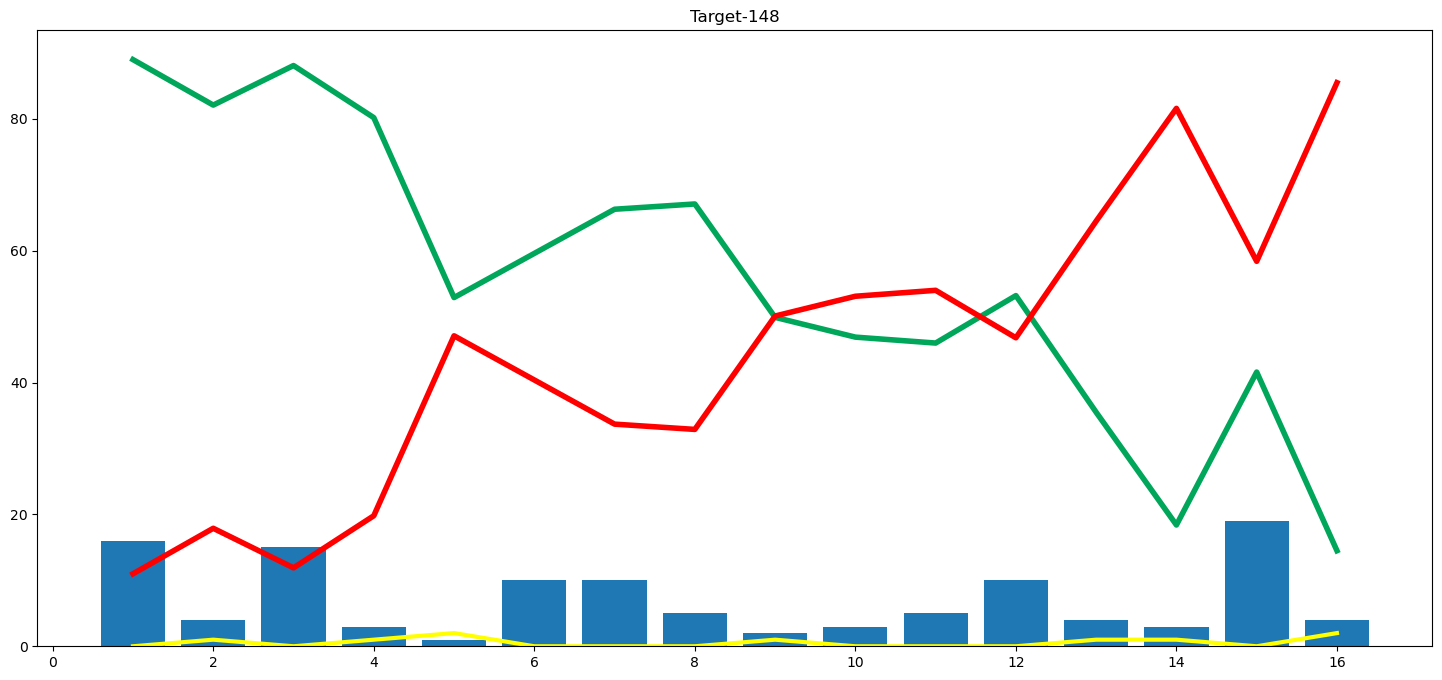

In [169]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [170]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Punjab Kings',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals',
 'Lucknow Super Giants',
 'Gujarat Titans']

In [171]:
delivery_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', nan,
       'Bengaluru', 'Indore', 'Dubai', 'Sharjah', 'Navi Mumbai',
       'Lucknow', 'Guwahati'], dtype=object)

## PIPE OBJECT

In [161]:
import pickle

In [162]:
pickle.dump(pipe, open('pipe.pkl', 'wb'))

In [163]:
pipe

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])